# **Project Title : Seoul Bike Sharing Demand Prediction** 


**Problem Description** 

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**
**Data Description** 
**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

**Attribute Information:** 

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours 

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting drive
from google.colab import drive     
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#csv file location
file_path= "/content/drive/MyDrive/Bike Sharing Prediction -Rohit Madame/SeoulBikeData.csv" 

In [ ]:
# reading csv file
df= pd.read_csv(file_path,encoding="latin")  

In [ ]:
#First 5 rows of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Last five rows of dataset

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#checking for shape
df.shape

(8760, 14)

In [ ]:
#Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Getting summary about dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Data cleaning

In [ ]:
#Renaming columns name as it contains some symbol

df.rename(columns={'Rented Bike Count':'Rented Bike Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew point temperature', 'Solar Radiation (MJ/m2)':'Solar Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning Day'},inplace=True)

In [ ]:
#checking for null values

df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

In [ ]:
#Duplicate values

df.duplicated().sum()

0

Text(0.5, 1.0, 'Missing Values')

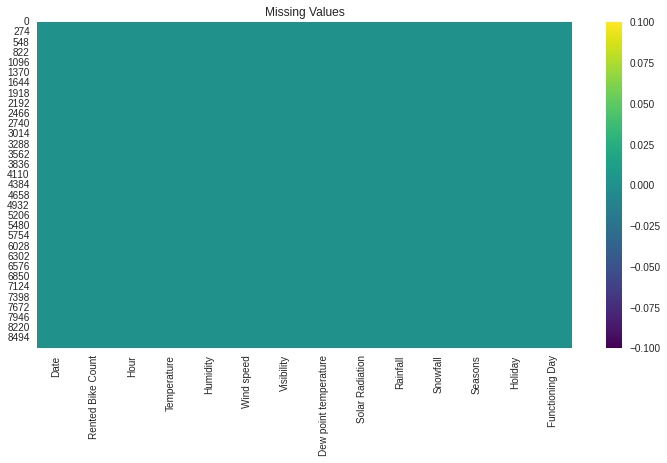

In [ ]:
#Heatmap for missing values

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title("Missing Values")

In [ ]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". 
df['Date']=df['Date'].astype('datetime64[ns]')

In [ ]:
# Creating new columns 'Month' ,'Day.
df['Month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day_name()                  
                                      

In [ ]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.

df['Weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
# check the Newly Created columns

df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [ ]:
# Now We can Drop Day and Date columns.

df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [ ]:
# counts for Seasons categories

df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# counts for Holiday categories

df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

EDA

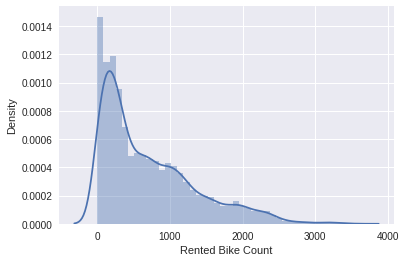

In [ ]:
#Distplot for the dependant variable

sns.distplot(df['Rented Bike Count'])

Rented Bike count has right skewness

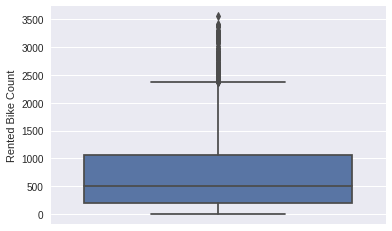

In [ ]:
#Boxplot for Rented Bike Count
sns.boxplot(y=df['Rented Bike Count'])

As We can see that this boxplot contains outliers

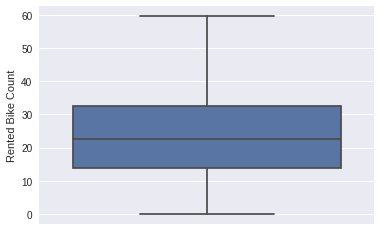

In [ ]:
sns.boxplot(y=np.sqrt(df['Rented Bike Count']))

After applying sqrt function to the Rented bike count we can conclude that all outliers are excluded.

Visualizing box plot for all numeric variables.

In [ ]:
numeric_variable=['Temperature','Dew point temperature','Humidity','Wind speed','Visibility','Solar Radiation','Rainfall','Snowfall']

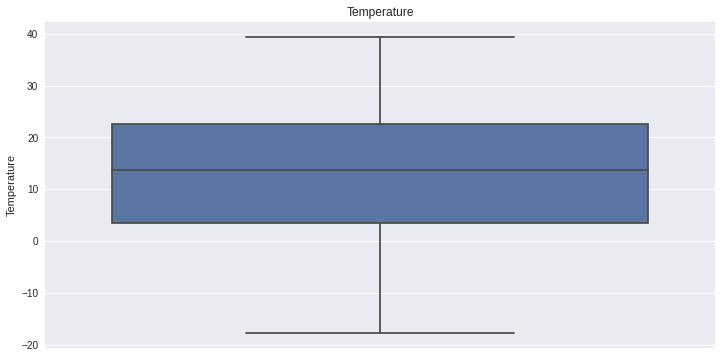

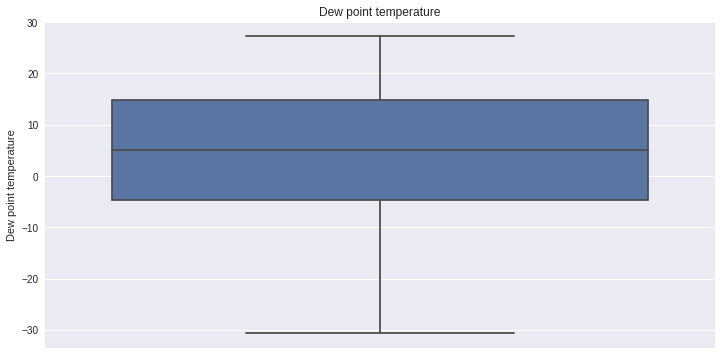

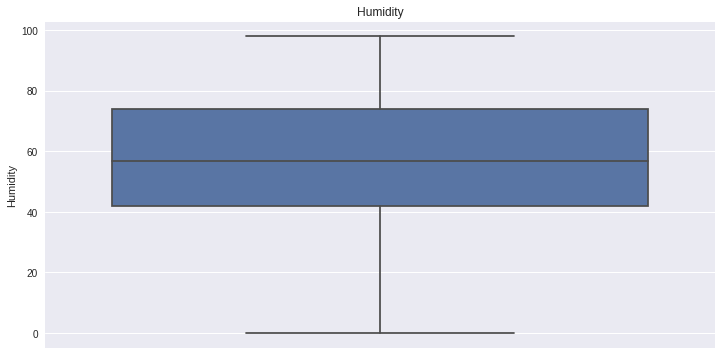

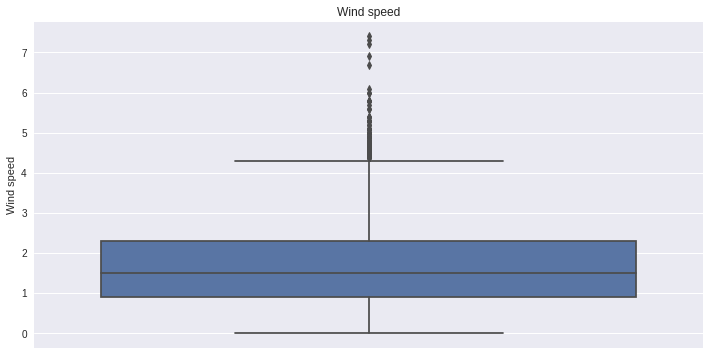

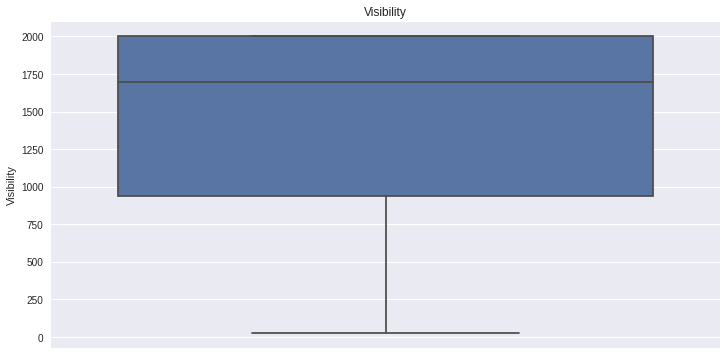

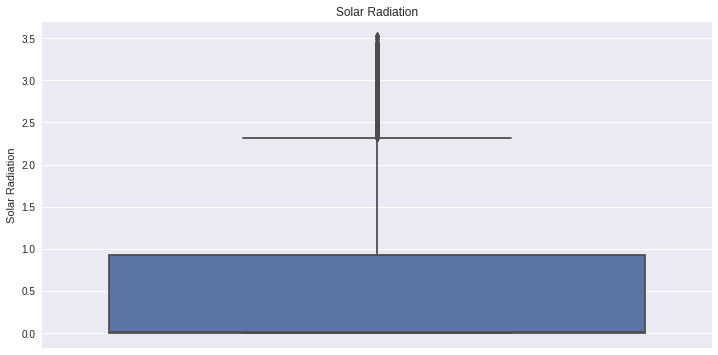

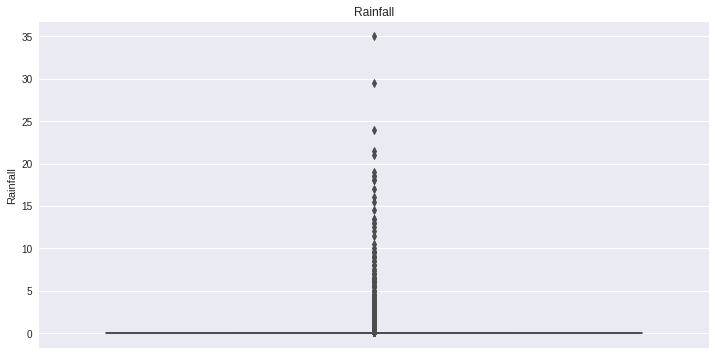

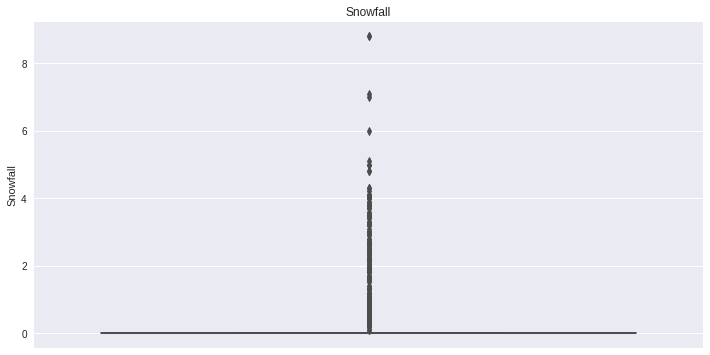

In [ ]:
for i in  numeric_variable:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=df[i])
    plt.title(i)

Checking Relation between Rented Bike Count and other independent variable. We can see that windspeed has some outliers.Also the rainfall,snowfall and solar radiation has outliers

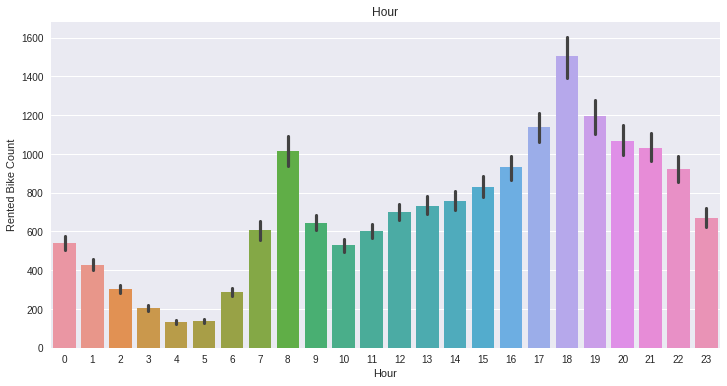

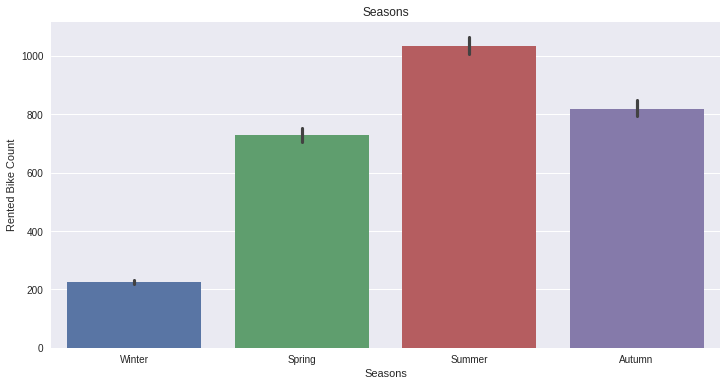

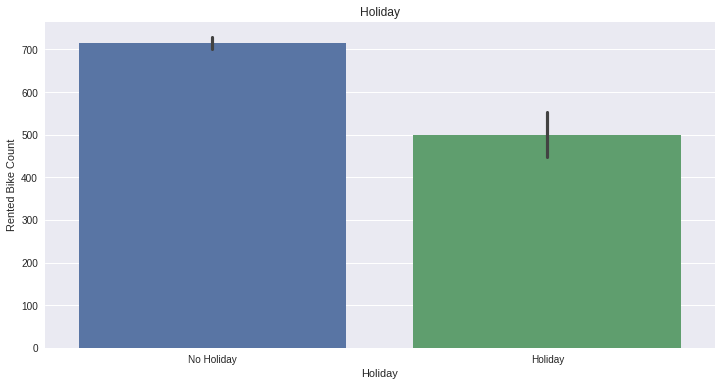

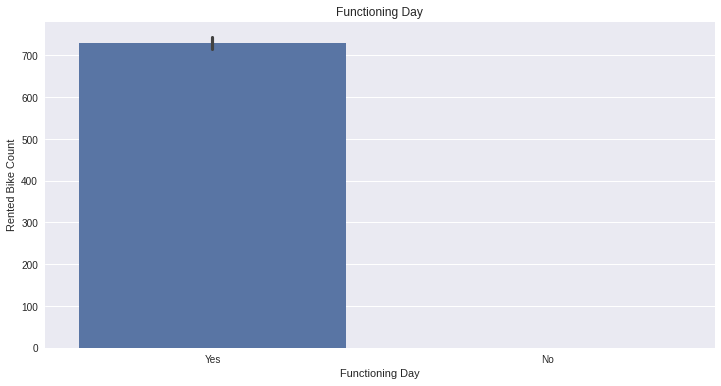

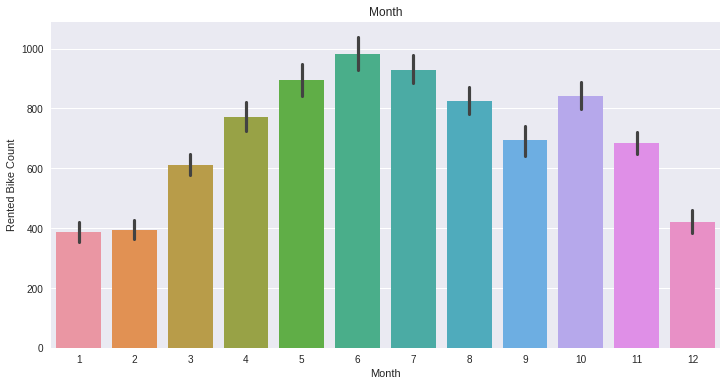

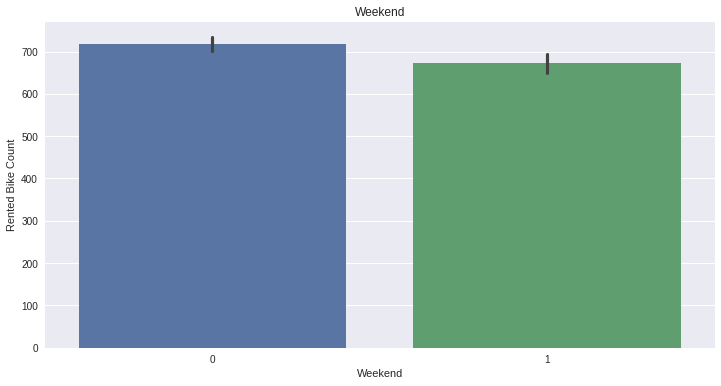

In [ ]:
categorical=['Hour','Seasons','Holiday','Functioning Day','Month','Weekend']

for i in categorical:
    plt.figure(figsize=(12,6))
    sns.barplot(x=df[i],y=df['Rented Bike Count'])
    plt.title(i)

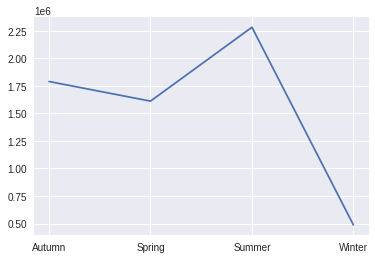

In [ ]:
plt.plot(df.groupby('Seasons').sum()['Rented Bike Count'])

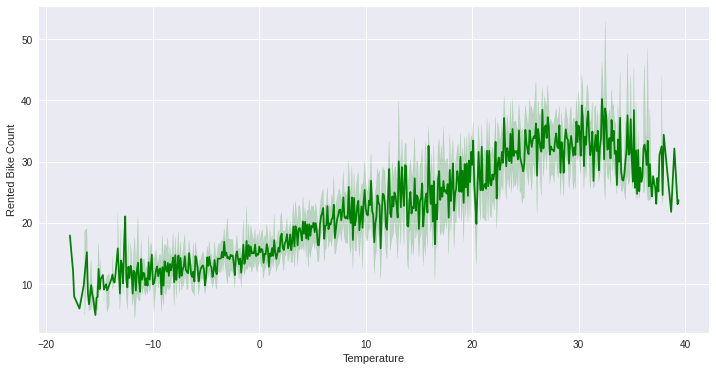

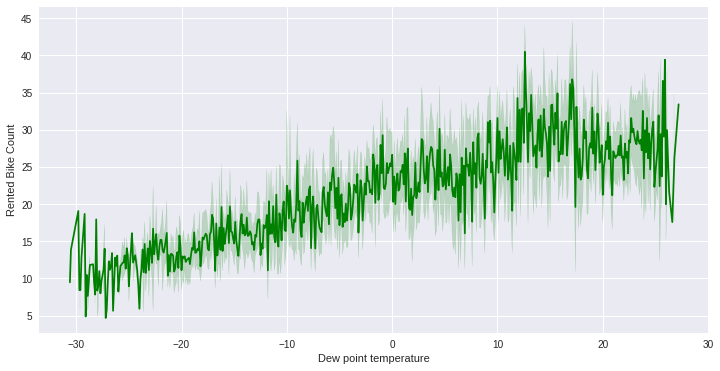

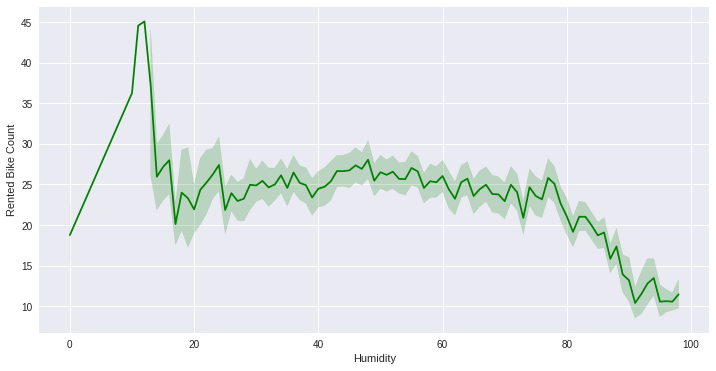

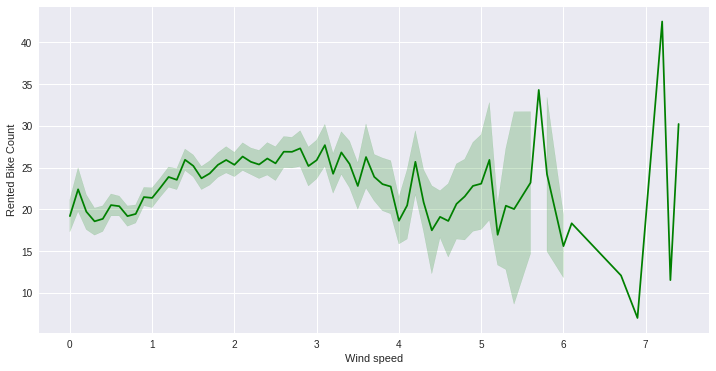

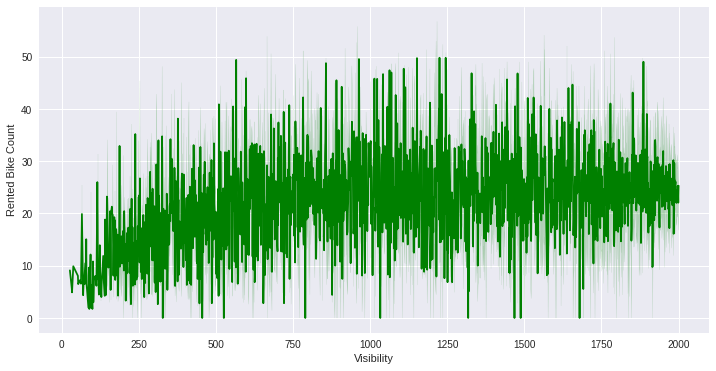

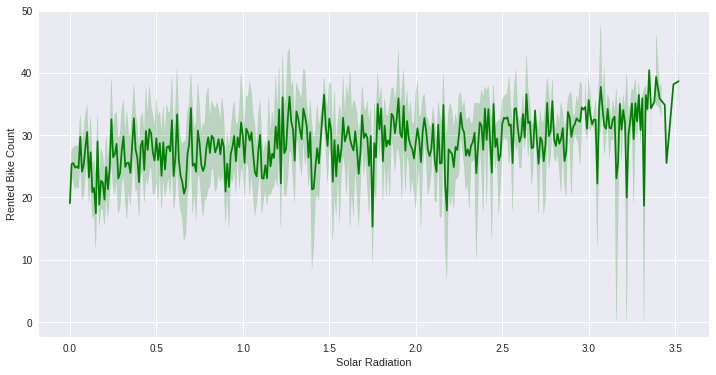

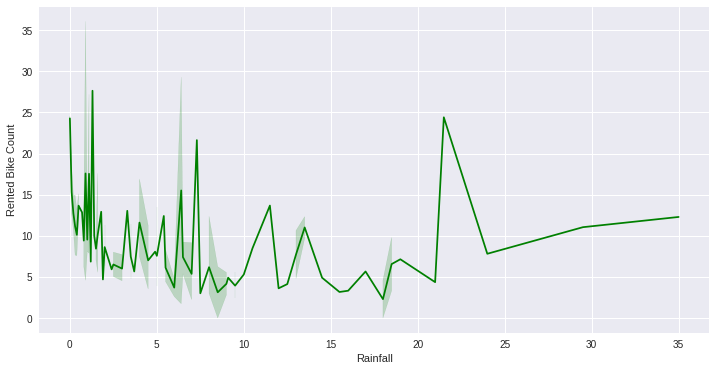

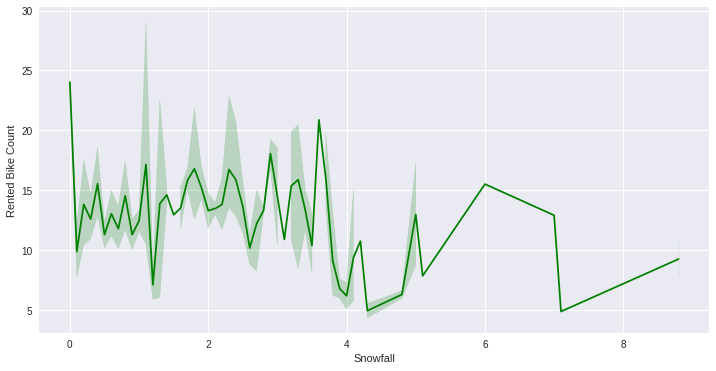

In [ ]:
for i in numeric_variable:
    plt.figure(figsize=(12,6))
    sns.lineplot(y=np.sqrt(df['Rented Bike Count']),x=df[i],color='green')
    

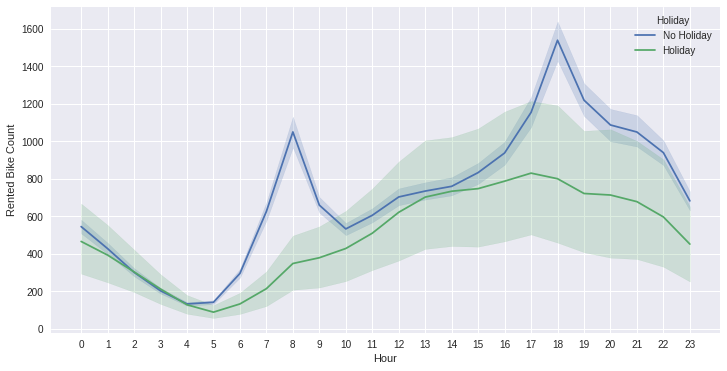

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(y=df['Rented Bike Count'],x=df['Hour'],hue=df['Holiday'])
plt.xticks(np.arange(0,24))
plt.show()

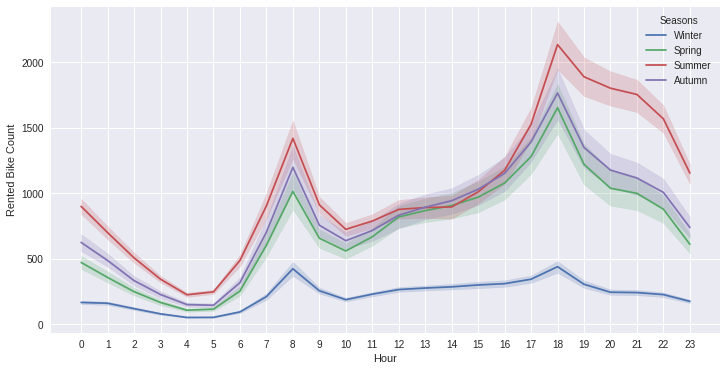

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(y=df['Rented Bike Count'],x=df['Hour'],hue=df['Seasons'])
plt.xticks(np.arange(0,24))
plt.show()

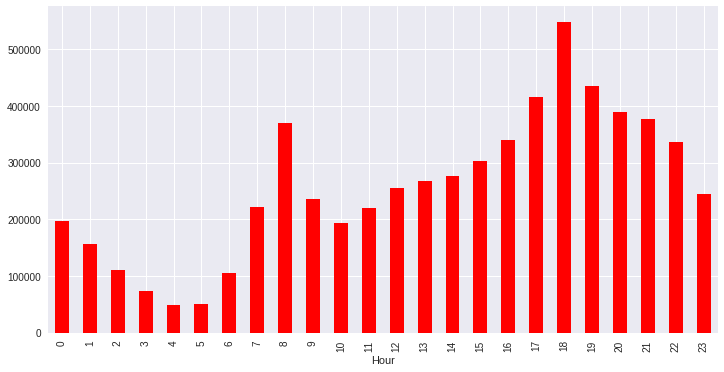

In [ ]:
plt.figure(figsize=(12,6))
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar(color='red')


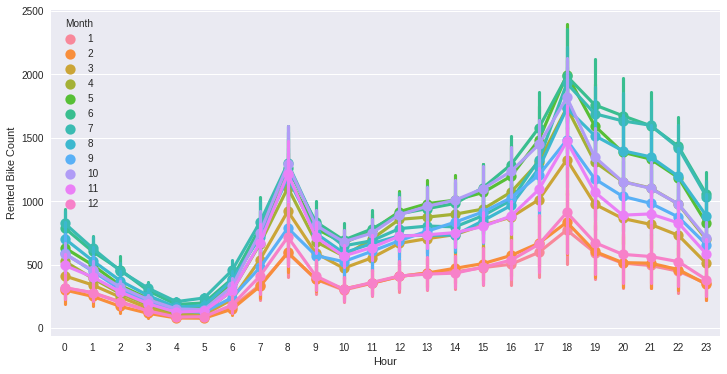

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(y=df['Rented Bike Count'],x=df['Hour'],hue=df['Month'])
plt.xticks(np.arange(0,24))
plt.show()

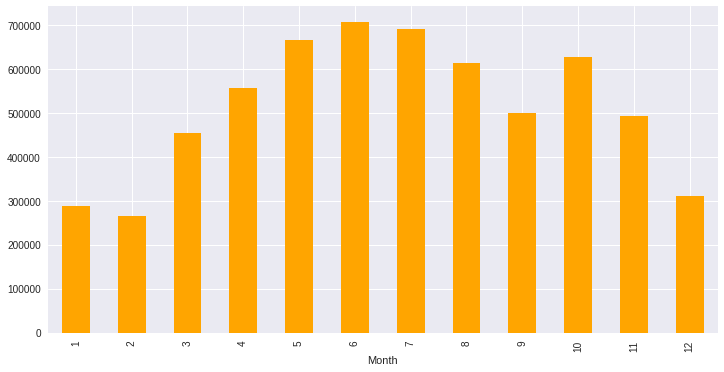

In [ ]:
plt.figure(figsize=(12,6))
df.groupby('Month').sum()['Rented Bike Count'].plot.bar(color='orange')

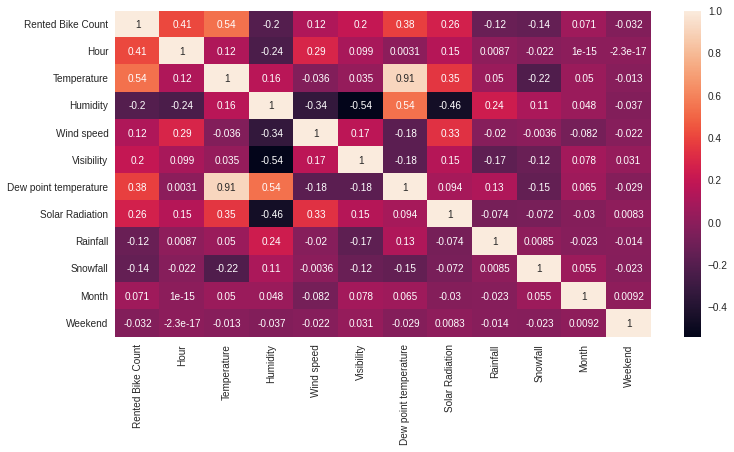

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew point temperature',inplace=True,axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()

def calc_vif(X):
     vif = pd.DataFrame()
     vif['Variables']=X.columns
     vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
     return (vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,Variables,VIF
0,Rented Bike Count,4.113498
1,Hour,4.690560
2,Temperature,4.482056
3,Humidity,6.387621
4,Wind speed,4.624566
5,Visibility,5.499290
6,Solar Radiation,2.282231
7,Rainfall,1.104609
8,Snowfall,1.125352
9,Month,4.613446


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,Variables,VIF
0,Rented Bike Count,3.893295
1,Hour,4.459251
2,Temperature,3.372814
3,Wind speed,3.751021
4,Solar Radiation,1.894786
5,Rainfall,1.070792
6,Snowfall,1.079399
7,Month,3.055277
8,Weekend,1.354179


In [ ]:
#dropping humidity and visibility as it is higher that 5
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [ ]:
#creating dummy variable for seasons
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [ ]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [ ]:
df['Functioning Day']=df['Functioning Day'].map({'Yes':1, 'No':0})

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['Rented Bike Count'],axis=1)
y=np.sqrt(df['Rented Bike Count'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Scaling the data set
#scaling of the data makes it easy for a model to learn and understand the problem.

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train=min_max.fit_transform(X_train)
X_test=min_max.transform(X_test)

Linear Regression

In [ ]:
#Importing the linear Regression
from sklearn.linear_model import LinearRegression

#Taking instance
lr=LinearRegression()

#Fitting to the dataset
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Getting the coefficient

pd.DataFrame(lr.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,13.666740
Temperature,23.153708
Wind speed,2.877915
Solar Radiation,3.741052
Rainfall,-57.872663
Snowfall,-10.161873
Holiday,-2.835705
Functioning Day,29.007460
Month,0.973792
Weekend,-0.415370


In [ ]:
#Predicting for training and test data

train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
#Checking on training data

#Calculating mean square error

MSE=mean_squared_error(y_train,train_pred)
print(f'MSE is :{MSE}')

#Calculating mean absolute error
MAE=mean_absolute_error(y_train,train_pred)
print(f'MAE is : {MAE}')


#Calculating root mean square error
RMSE=np.sqrt(MSE)
print(f'RMSE is :{RMSE}')

#Calculating r2 score
R2=r2_score(y_train,train_pred)
print(f'r2 score is : {R2}')

MSE is :58.86666600410468
MAE is : 5.81693071701338
RMSE is :7.67246153487293
r2 score is : 0.6234494478102126


**Evalution on test data**

In [ ]:
#Checking on test data

#Calculating mean square error

MSE=mean_squared_error(y_test,test_pred)
print(f'MSE is :{MSE}')

#Calculating mean absolute error
MAE=mean_absolute_error(y_test,test_pred)
print(f'MAE is : {MAE}')


#Calculating root mean square error
RMSE=np.sqrt(MSE)
print(f'RMSE is :{RMSE}')

#Calculating r2 score
R2=r2_score(y_test,test_pred)
print(f'r2 score is : {R2}')

MSE is :62.50721911345458
MAE is : 5.904328750975208
RMSE is :7.906150714061463
r2 score is : 0.5885590355250454


On testing data R2 score is 0.6339 which is close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

Text(0.5, 0, 'y_predicted')

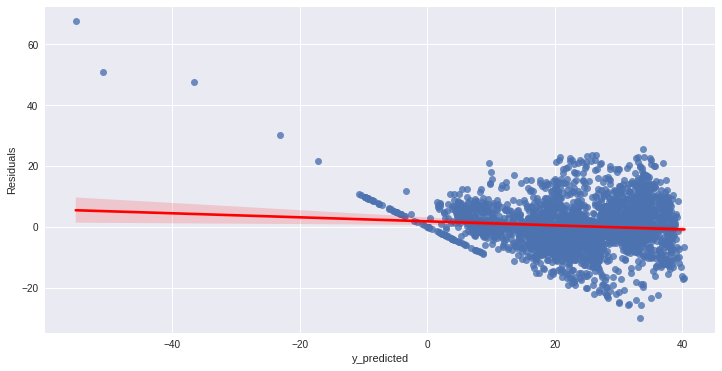

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=test_pred,y=y_test-test_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Ridge Regression

In [ ]:
#Taking  the instance
from sklearn.linear_model import Ridge
rg=Ridge(alpha=0.01)

In [ ]:
#Fitting to the dataset

rg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
rg.score(X_train,y_train)

0.6234494140563246

In [ ]:
rg.score(X_test,y_test)

0.58860297572659

In [ ]:
#Getting the coefficient

pd.DataFrame(rg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,13.666633
Temperature,23.149965
Wind speed,2.877581
Solar Radiation,3.742578
Rainfall,-57.819888
Snowfall,-10.157278
Holiday,-2.835406
Functioning Day,29.005610
Month,0.973927
Weekend,-0.415347


In [ ]:
#Predicting for training and test dataset

y_pred_train_ridge=rg.predict(X_train)
y_pred_test_ridge=rg.predict(X_test)

In [ ]:

#calculate MSE
MSE_rg= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_rg)

#calculate RMSE
RMSE_rg=np.sqrt(MSE_rg)
print("RMSE :",RMSE_rg)


#calculate MAE
MAE_rg= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_rg)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rg= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_rg)

MSE : 58.86667128089645
RMSE : 7.672461878751594
MAE : 5.816977349615225
R2 : 0.6234494140563246


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_ridge)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_ridge)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test_ridge)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.904325320733732.
 The Mean Squred Error(MSE) is 62.500543599728466.
The Root Mean Squared Error(RMSE) is 7.90572853061174.
The R2 Score is 0.58860297572659.


Text(0.5, 0, 'y_predicted')

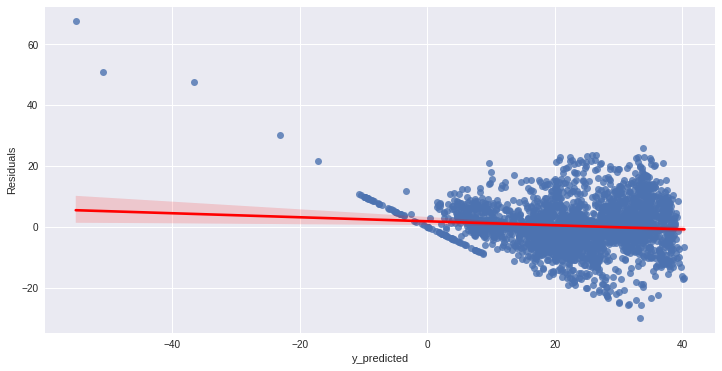

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=y_pred_test_ridge,y=y_test-y_pred_test_ridge,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Gradient Boosting Regressor

In [ ]:
#Taking the instance
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [ ]:
#Fitting to the training and test data
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
gbr.score(X_train,y_train)

0.8687695753474868

In [ ]:
gbr.score(X_test,y_test)

0.8523687540400904

In [ ]:
#Predicting for train and test data

gbr_train=gbr.predict(X_train)
gbr_test=gbr.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,gbr_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,gbr_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,gbr_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 3.2000747025171923.
The Mean Squred Error(MSE) is 20.515432875272356.
The Root Mean Squared Error(RMSE) is 4.529396524402821.
The R2 Score is 0.8687695753474868.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,gbr_test)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,gbr_test)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,gbr_test)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.3112335732311573.
 The Mean Squred Error(MSE) is 22.428536378200388.
The Root Mean Squared Error(RMSE) is 4.735877572129625.
The R2 Score is 0.8523687540400904.


In [ ]:
#Hyperparameter tunning
param = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }


In [ ]:
from sklearn.model_selection import GridSearchCV
#Gridsearch
grad_tuning=GridSearchCV(gbr,param_grid=param,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_tuning.fit(X_train,y_train)


GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
#Best Parameters
grad_tuning.best_params_

{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.5}

In [ ]:
 # USing best paramters tunned by GridsearchCv 
grad_tuned=GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=150,
                          subsample=0.5)

In [ ]:
# checking score on train data
grad_tuned.score(X_train,y_train)

0.9852000739409217

In [ ]:
# checking score on test data
grad_tuned.score(X_test,y_test)

0.910414450934931

Text(0.5, 0, 'y_predicted')

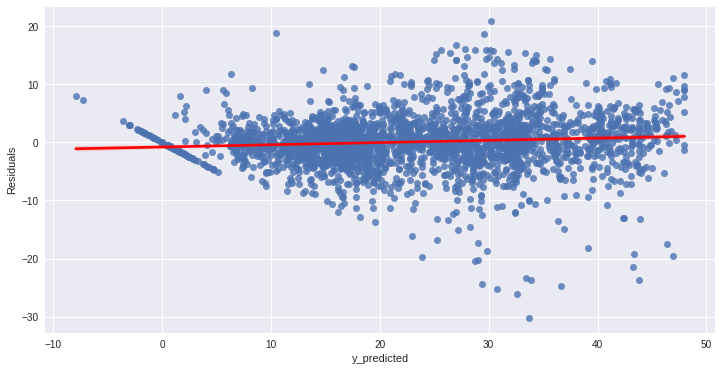

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=gbr_test,y=y_test-gbr_test,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Random Forest Regressor

In [ ]:
#Fitting the randomforestregressor to datase
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
#Checking the score on training dataset
rf.score(X_train,y_train)

0.9859844965326103

In [ ]:
#Checking score on test data
rf.score(X_test,y_test)

0.9007708208302426

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.9444382458681332.
The Mean Squred Error(MSE) is 2.1910629441285883.
The Root Mean Squared Error(RMSE) is 1.480223950667124.
The R2 Score is 0.9859844965326103.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.5097695428627795.
 The Mean Squred Error(MSE) is 15.075164070566993.
The Root Mean Squared Error(RMSE) is 3.88267486026927.
The R2 Score is 0.9007708208302426.


Text(0.5, 0, 'y_predicted')

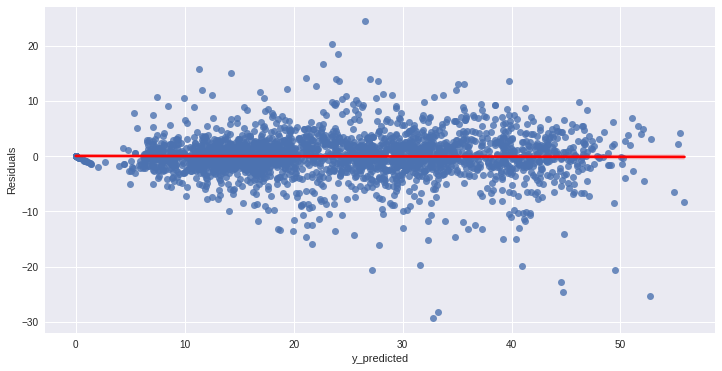

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Conclusion



In the analysis, we  did EDA for all the features of the dataset. First, we analyzed the dependent variable "Rented Bike Count" and converted it. Then I analyzed the categorical variables and removed the variables with the majority of the class. We also analyzed numerical variables to find out their correlations, distributions, and relationships with dependent variables. We've also removed some numeric features, most of which have a value of 0, and we have replaced it with 0 and 1. Because this data is time-dependent, the values ​​of variables such as temperature, wind speed, and amount of solar radiation are not always consistent.  

